In [1]:
import sys
sys.path.insert(0,'..')

%load_ext autoreload
%autoreload 2

In [2]:
import football_modelling.metrica.io as mio
import football_modelling.metrica.viz as mviz
from football_modelling.data import load_metrica_dir

# set up initial path to data
metrica_dir = load_metrica_dir()
game_id = 2  # let's look at sample match 2


In [3]:
# read in the event data
events = mio.read_event_data(metrica_dir, game_id)


In [4]:
# count the number of each event type in the data
print(events["Type"].value_counts())


PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64


In [5]:
# Bit of housekeeping: unit conversion from metric data units to meters
events = mio.to_metric_coordinates(events)
# Get events by team
home_events = events[events["Team"] == "Home"]
away_events = events[events["Team"] == "Away"]

# Frequency of each event type by team
home_events["Type"].value_counts()
away_events["Type"].value_counts()

# Get all shots
shots = events[events["Type"] == "SHOT"]
home_shots = home_events[home_events.Type == "SHOT"]
away_shots = away_events[away_events.Type == "SHOT"]


In [6]:
# Look at frequency of each shot Subtype
home_shots["Subtype"].value_counts()


ON TARGET-SAVED        4
HEAD-OFF TARGET-OUT    4
OFF TARGET-OUT         2
ON TARGET-GOAL         2
HEAD-ON TARGET-GOAL    1
Name: Subtype, dtype: int64

In [7]:
away_shots["Subtype"].value_counts()


OFF TARGET-OUT         3
BLOCKED                2
ON TARGET-GOAL         2
ON TARGET-SAVED        2
OFF TARGET-HEAD-OUT    1
HEAD-OFF TARGET-OUT    1
Name: Subtype, dtype: int64

In [8]:
# Look at the number of shots taken by each home player
print(home_shots["From"].value_counts())


Player9     4
Player10    3
Player5     2
Player3     1
Player4     1
Player7     1
Player12    1
Name: From, dtype: int64


In [10]:
# Get the shots that led to a goal
home_goals = home_shots[home_shots["Subtype"].str.contains("-GOAL")].copy()
away_goals = away_shots[away_shots["Subtype"].str.contains("-GOAL")].copy()
# Add a column event 'Minute' to the data frame
home_goals["Minute"] = home_goals["Start Time [s]"] / 60.0


Text(-47.7, -3.400000000000003, '')

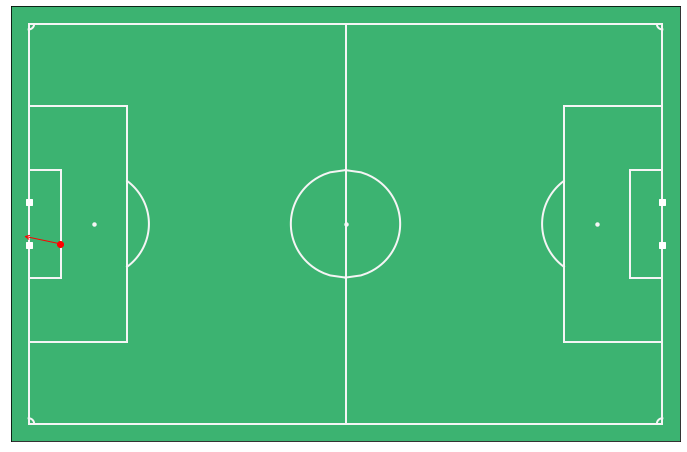

In [11]:
# Plot the first goal
fig, ax = mviz.plot_pitch()
ax.plot(events.loc[198]["Start X"], events.loc[198]["Start Y"], "ro")
ax.annotate(
    "",
    xy=events.loc[198][["End X", "End Y"]],
    xytext=events.loc[198][["Start X", "Start Y"]],
    alpha=0.6,
    arrowprops=dict(arrowstyle="->", color="r"),
)


(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

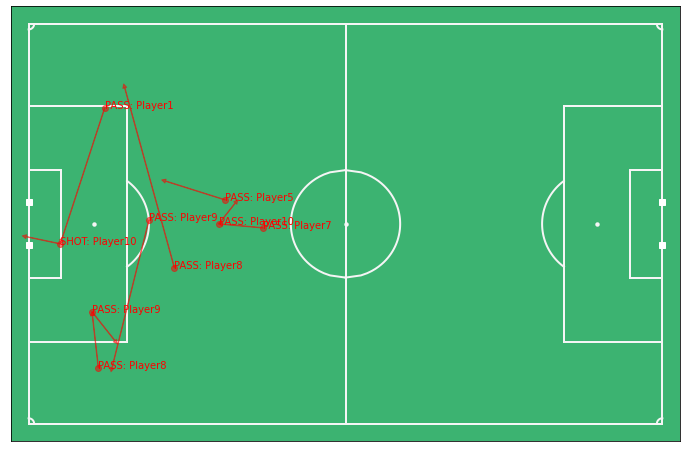

In [12]:
# plot passing move in run up to goal
mviz.plot_events(events.loc[190:198], indicators=["Marker", "Arrow"], annotate=True)


In [14]:
#### TRACKING DATA ####

# READING IN TRACKING DATA
tracking_home = mio.tracking_data(metrica_dir, game_id, "Home")
tracking_away = mio.tracking_data(metrica_dir, game_id, "Away")


Reading team: home
Reading team: away


In [15]:
# Look at the column namems
print(tracking_home.columns)


Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')


In [17]:
# Convert positions from metrica units to meters
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)


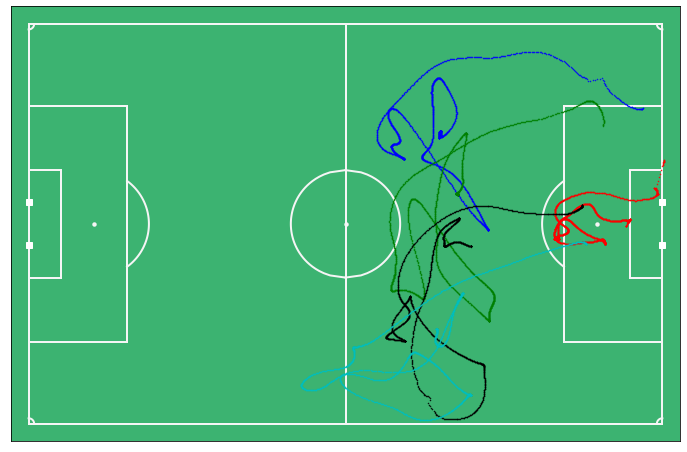

In [20]:
# Plot some player trajectories (players 11,1,2,3,4)
fig, ax = mviz.plot_pitch()
ax.plot(
    tracking_home["Home_11_x"].iloc[:1500],
    tracking_home["Home_11_y"].iloc[:1500],
    "r.",
    markersize=1,
)
ax.plot(
    tracking_home["Home_1_x"].iloc[:1500],
    tracking_home["Home_1_y"].iloc[:1500],
    "b.",
    markersize=1,
)
ax.plot(
    tracking_home["Home_2_x"].iloc[:1500],
    tracking_home["Home_2_y"].iloc[:1500],
    "g.",
    markersize=1,
)
ax.plot(
    tracking_home["Home_3_x"].iloc[:1500],
    tracking_home["Home_3_y"].iloc[:1500],
    "k.",
    markersize=1,
)
ax.plot(
    tracking_home["Home_4_x"].iloc[:1500],
    tracking_home["Home_4_y"].iloc[:1500],
    "c.",
    markersize=1,
)


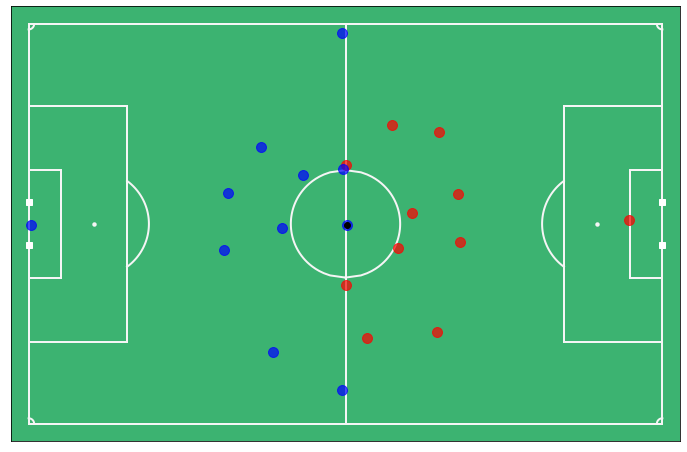

In [24]:
# plot player positions at ,atckick-off
KO_Frame = events.loc[0]["Start Frame"]
fig, ax = mviz.plot_frame(tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame])


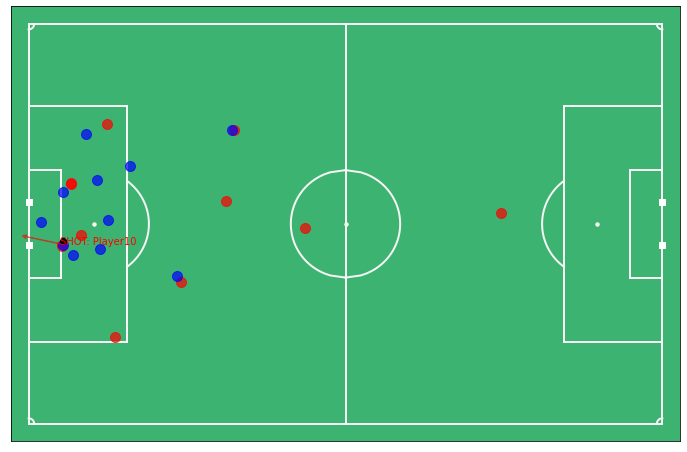

In [25]:
# PLOT POISTIONS AT GOAL
fig, ax = mviz.plot_events(
    events.loc[198:198], indicators=["Marker", "Arrow"], annotate=True
)
goal_frame = events.loc[198]["Start Frame"]
fig, ax = mviz.plot_frame(
    tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax=(fig, ax)
)
